In [1]:
from nn.neural_network import NeuralNetwork

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, load_iris

In [2]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos.
# _X, y = make_circles(n_samples=1000, factor=0.5, noise=0.07)
_X, y = load_iris(return_X_y=True)
X = pd.DataFrame(_X)
X['_class'] = y
np.random.seed(0)
X.sample(6)

,0,1,2,3,_class
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2


In [3]:
trainset, testset = train_test_split(X, test_size=0.5)

X_train = trainset[[i for i in range(4)]]
y_train = trainset._class.to_numpy()

X_test = testset[[i for i in range(4)]]
y_test = testset._class.to_numpy()

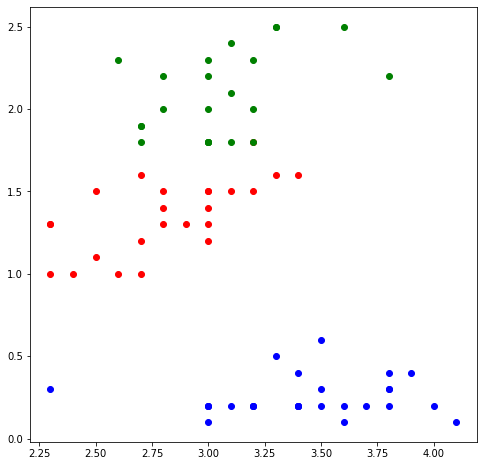

In [4]:
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

# Visualización de la nube de datos.
plt.scatter(trainset[trainset._class == 0][1], trainset[trainset._class == 0][3], c='blue')
plt.scatter(trainset[trainset._class == 1][1], trainset[trainset._class == 1][3], c='red')
plt.scatter(trainset[trainset._class == 2][1], trainset[trainset._class == 2][3], c='green')

In [5]:
model = NeuralNetwork(loss_f='mse')

model.add_layer(n_conn=X_train.shape[1], n_neur=4, act_f='sigmoid')
model.add_layer(n_neur=8, act_f='sigmoid')
model.add_layer(n_neur=3, act_f='sigmoid')

In [6]:
_y_train = [[1 if i == x else 0 for i in range(3)] for x in y_train] 
_y_test = [[1 if i == x else 0 for i in range(3)] for x in y_test] 

In [7]:
model.fit(X_train.to_numpy(), _y_train, epoch=10000, lr=0.005)

In [8]:
yp = model.predict(X_test.to_numpy())
model.loss_f[0](yp, _y_test)

0.020066262837674667

In [9]:
results = [np.argmax(x) for x in yp]
X_test['_class'] = results

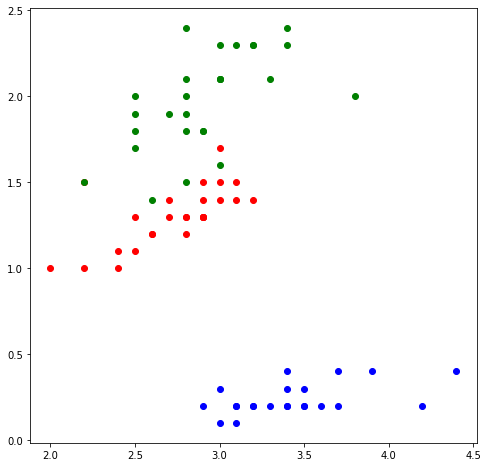

In [10]:
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

# Visualización de la nube de datos.
plt.scatter(testset[testset._class == 0][1], testset[testset._class == 0][3], c='blue')
plt.scatter(testset[testset._class == 1][1], testset[testset._class == 1][3], c='red')
plt.scatter(testset[testset._class == 2][1], testset[testset._class == 2][3], c='green')

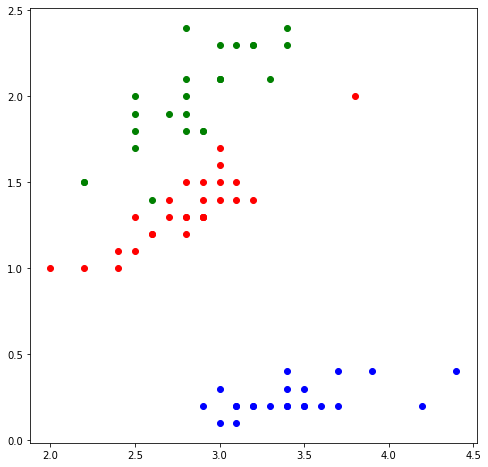

In [11]:
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))

# Visualización de la nube de datos.
plt.scatter(X_test[X_test._class == 0][1], X_test[X_test._class == 0][3], c='blue')
plt.scatter(X_test[X_test._class == 1][1], X_test[X_test._class == 1][3], c='red')
plt.scatter(X_test[X_test._class == 2][1], X_test[X_test._class == 2][3], c='green')